In [ ]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
def id(df):
    return df.reset_index().drop("index", axis=1)

In [ ]:
def dtparse(df, datename):
    return pd.to_datetime(df[datename], format="%Y-%m-%d")

# Cleaning Data

### Polling Probabilities

In [ ]:
poll_predictions = pd.read_csv("/work/election-forecasts-2020/election-forecasts-2020/presidential_scenario_analysis_2020.csv")
trump_wins = poll_predictions[(poll_predictions["scenario_id"] == 3)][["modeldate", "probability"]]
trump_wins = id(trump_wins)
trump_wins

,modeldate,probability
0,11/3/2020,0.025700
1,11/2/2020,0.025625
2,11/1/2020,0.028900
3,10/31/2020,0.029525
4,10/30/2020,0.030175
...,...,...
151,6/5/2020,0.205150
152,6/4/2020,0.187825
153,6/3/2020,0.190275
154,6/2/2020,0.192300


In [ ]:
trump_wins["Date"] = pd.to_datetime(trump_wins["modeldate"], format="%m/%d/%Y")
trump_wins

,modeldate,probability,Date
0,11/3/2020,0.025700,2020-11-03
1,11/2/2020,0.025625,2020-11-02
2,11/1/2020,0.028900,2020-11-01
3,10/31/2020,0.029525,2020-10-31
4,10/30/2020,0.030175,2020-10-30
...,...,...,...
151,6/5/2020,0.205150,2020-06-05
152,6/4/2020,0.187825,2020-06-04
153,6/3/2020,0.190275,2020-06-03
154,6/2/2020,0.192300,2020-06-02


In [ ]:
trump_wins = trump_wins.drop("modeldate", axis=1)

In [ ]:
biden_wins = poll_predictions[(poll_predictions["scenario_id"] == 4)][["modeldate", "probability"]]

In [ ]:
biden_wins = id(biden_wins)
biden_wins["Date"] = pd.to_datetime(biden_wins["modeldate"], format="%m/%d/%Y")
biden_wins = biden_wins.drop("modeldate", axis=1)
biden_wins

,probability,Date
0,0.974300,2020-11-03
1,0.974375,2020-11-02
2,0.971100,2020-11-01
3,0.970475,2020-10-31
4,0.969825,2020-10-30
...,...,...
151,0.794850,2020-06-05
152,0.812175,2020-06-04
153,0.809725,2020-06-03
154,0.807700,2020-06-02


### Stock Prices

In [ ]:
stocks = ["DNNGY", "IBDRY", "VWDRY", "BEP", "FSLR"]

def df_maker(stocks, df):
    if bool(stocks) == False:
        return df
    else:
        df[stocks[0]] = yf.download(stocks[0], start='2020-05-28', progress=False)["Close"]
    return df_maker(stocks[1:], df)

In [ ]:
prices = df_maker(stocks, pd.DataFrame())
prices

,DNNGY,IBDRY,VWDRY,BEP,FSLR
Date,,,,,
2020-05-28,37.750000,42.220001,6.556,25.579536,45.520000
2020-05-29,39.240002,43.110001,6.792,26.032507,46.619999
2020-06-01,39.820000,43.400002,6.894,25.723421,48.009998
2020-06-02,39.029999,44.330002,6.920,25.787371,47.900002
2020-06-03,39.650002,45.580002,7.080,25.989876,49.500000
...,...,...,...,...,...
2022-06-15,33.020000,41.869999,7.620,34.820000,64.029999
2022-06-16,32.299999,41.509998,7.620,33.400002,62.009998
2022-06-17,32.590000,41.259998,7.600,33.410000,66.709999


In [ ]:
prices = prices.reset_index()

In [ ]:
prices

,Date,DNNGY,IBDRY,VWDRY,BEP,FSLR
0,2020-05-28,37.750000,42.220001,6.556,25.579536,45.520000
1,2020-05-29,39.240002,43.110001,6.792,26.032507,46.619999
2,2020-06-01,39.820000,43.400002,6.894,25.723421,48.009998
3,2020-06-02,39.029999,44.330002,6.920,25.787371,47.900002
4,2020-06-03,39.650002,45.580002,7.080,25.989876,49.500000
...,...,...,...,...,...,...
517,2022-06-15,33.020000,41.869999,7.620,34.820000,64.029999
518,2022-06-16,32.299999,41.509998,7.620,33.400002,62.009998
519,2022-06-17,32.590000,41.259998,7.600,33.410000,66.709999
520,2022-06-21,33.910000,40.889999,8.100,33.599998,68.199997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


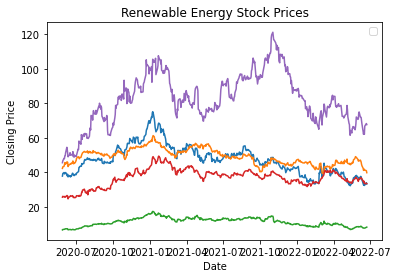

In [ ]:
for i in prices.columns[1:]:
    plt.plot(prices["Date"], prices[i])
    #plt.title(i)
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
plt.title("Renewable Energy Stock Prices")
plt.legend()
#plt.axvline(x=prices[prices["Date"] == "2020-11-09"]["Date"][0])

In [ ]:
def diff_df_maker(stocks, df):
    if bool(stocks) == False:
        return df
    else:
        values = yf.download(stocks[0], start='2020-05-28', progress=False)["Close"]
        portions = []
        for o in range(1, len(values)):
            portions.append((values[o]-values[o-1])/values[o-1])
        df[stocks[0]] = portions
    return diff_df_maker(stocks[1:], df)

In [ ]:
diff = diff_df_maker(stocks, pd.DataFrame())
diff = diff.reset_index()
diff

,index,DNNGY,IBDRY,VWDRY,BEP,FSLR
0,0,0.039470,0.021080,0.035997,0.017708,0.024165
1,1,0.014781,0.006727,0.015018,-0.011873,0.029816
2,2,-0.019839,0.021429,0.003771,0.002486,-0.002291
3,3,0.015885,0.028198,0.023121,0.007853,0.033403
4,4,-0.009836,-0.005485,0.001412,-0.017634,0.002222
...,...,...,...,...,...,...
516,516,0.012883,0.019727,-0.005222,0.016049,0.033575
517,517,-0.021805,-0.008598,0.000000,-0.040781,-0.031548
518,518,0.008978,-0.006023,-0.002625,0.000299,0.075794
519,519,0.040503,-0.008967,0.065790,0.005687,0.022335


In [ ]:
diff = diff.drop("index", axis=1)
diff["Date"] = prices["Date"]
diff

,DNNGY,IBDRY,VWDRY,BEP,FSLR,Date
0,0.039470,0.021080,0.035997,0.017708,0.024165,2020-05-28
1,0.014781,0.006727,0.015018,-0.011873,0.029816,2020-05-29
2,-0.019839,0.021429,0.003771,0.002486,-0.002291,2020-06-01
3,0.015885,0.028198,0.023121,0.007853,0.033403,2020-06-02
4,-0.009836,-0.005485,0.001412,-0.017634,0.002222,2020-06-03
...,...,...,...,...,...,...
516,0.012883,0.019727,-0.005222,0.016049,0.033575,2022-06-14
517,-0.021805,-0.008598,0.000000,-0.040781,-0.031548,2022-06-15
518,0.008978,-0.006023,-0.002625,0.000299,0.075794,2022-06-16
519,0.040503,-0.008967,0.065790,0.005687,0.022335,2022-06-17


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


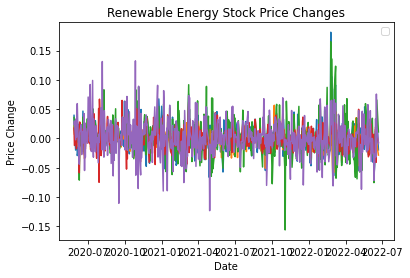

In [ ]:
for i in diff.columns[:5]:
    plt.plot(diff["Date"], diff[i])
    #plt.title(i)
    plt.xlabel("Date")
    plt.ylabel("Price Change")
plt.title("Renewable Energy Stock Price Changes")
plt.legend()

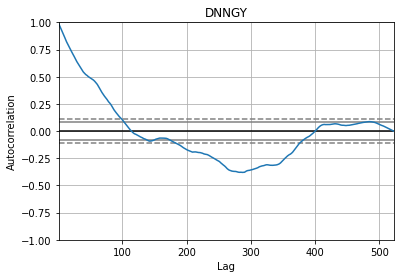

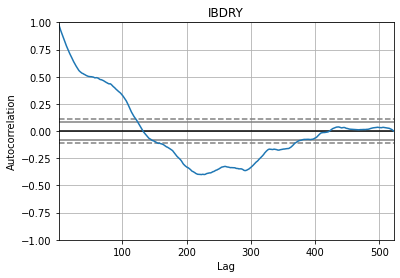

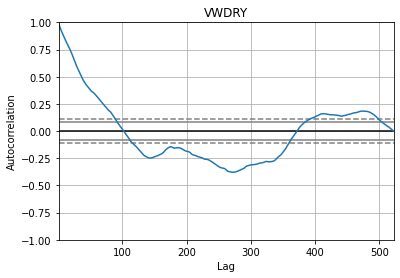

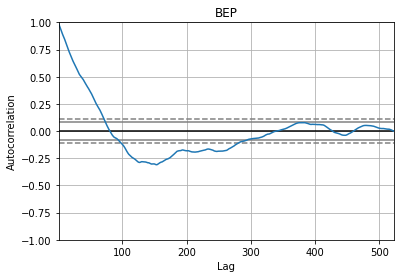

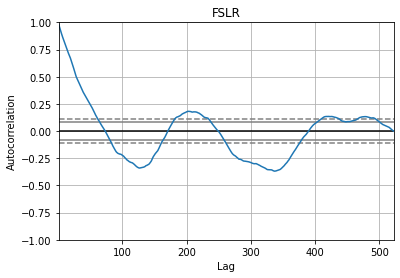

In [ ]:
from pandas.plotting import autocorrelation_plot

for i in prices.columns[1:]:
    autocorrelation_plot(prices[i])
    plt.title(i)
    plt.show()

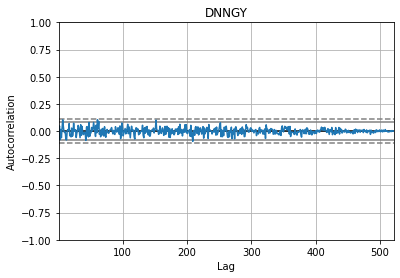

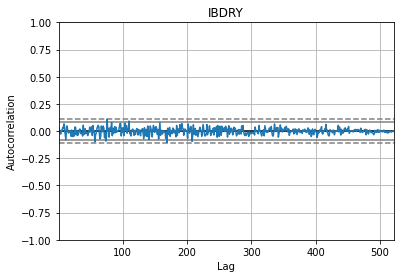

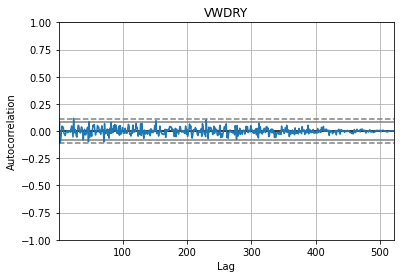

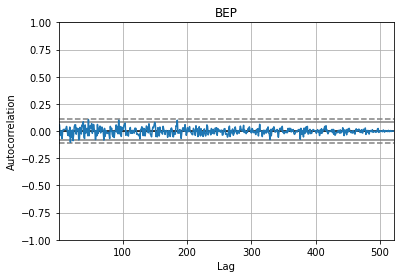

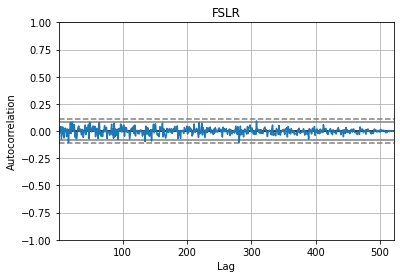

In [ ]:
for i in diff.columns[:5]:
    autocorrelation_plot(diff[i])
    plt.title(i)
    plt.show()

In [ ]:
avgs = []

for i in range(0, len(diff)):
    avgs.append(np.mean(diff.iloc[i][:5]))

diff["Average"] = avgs

In [ ]:
diff

,DNNGY,IBDRY,VWDRY,BEP,FSLR,Date,Average
0,0.039470,0.021080,0.035997,0.017708,0.024165,2020-05-28,0.027684
1,0.014781,0.006727,0.015018,-0.011873,0.029816,2020-05-29,0.010894
2,-0.019839,0.021429,0.003771,0.002486,-0.002291,2020-06-01,0.001111
3,0.015885,0.028198,0.023121,0.007853,0.033403,2020-06-02,0.021692
4,-0.009836,-0.005485,0.001412,-0.017634,0.002222,2020-06-03,-0.005864
...,...,...,...,...,...,...,...
516,0.012883,0.019727,-0.005222,0.016049,0.033575,2022-06-14,0.015403
517,-0.021805,-0.008598,0.000000,-0.040781,-0.031548,2022-06-15,-0.020546
518,0.008978,-0.006023,-0.002625,0.000299,0.075794,2022-06-16,0.015285
519,0.040503,-0.008967,0.065790,0.005687,0.022335,2022-06-17,0.025070


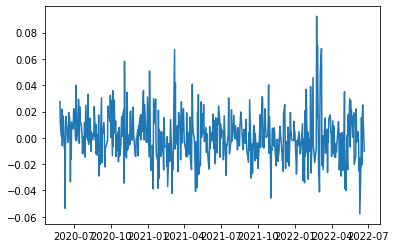

In [ ]:
plt.plot(diff["Date"], diff["Average"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

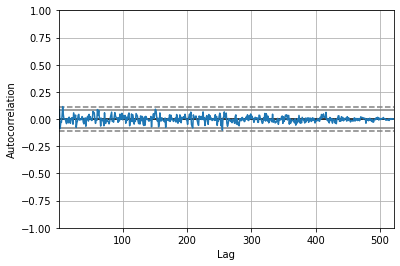

In [ ]:
autocorrelation_plot(diff["Average"])

### Days Before Election

In [ ]:
from datetime import date

def date_(table, yum):
    before1 = []
    for i in range(0, len(diff)):
        delta = (pd.to_datetime(date(2020, 11, 8)) - table["Date"][i])
        before1.append(delta)

    before2 = [int(i.days) for i in before1]
    before = []

    if yum == True:
        for i in before2:
            if i < 0:
                before.append(0)
            else:
                before.append(i)
    else:
        for i in before2:
            if i > 0:
                before.append(0)
            else:
                before.append(np.abs(i))
    return before

In [ ]:
before = date_(diff, True)
after = date_(diff, False)

In [ ]:
diff["Days Before"] = before
diff["Days After"] = after
diff

,DNNGY,IBDRY,VWDRY,BEP,FSLR,Date,Average,Days Before,Days After
0,0.039470,0.021080,0.035997,0.017708,0.024165,2020-05-28,0.027684,164,0
1,0.014781,0.006727,0.015018,-0.011873,0.029816,2020-05-29,0.010894,163,0
2,-0.019839,0.021429,0.003771,0.002486,-0.002291,2020-06-01,0.001111,160,0
3,0.015885,0.028198,0.023121,0.007853,0.033403,2020-06-02,0.021692,159,0
4,-0.009836,-0.005485,0.001412,-0.017634,0.002222,2020-06-03,-0.005864,158,0
...,...,...,...,...,...,...,...,...,...
516,0.012883,0.019727,-0.005222,0.016049,0.033575,2022-06-14,0.015403,0,583
517,-0.021805,-0.008598,0.000000,-0.040781,-0.031548,2022-06-15,-0.020546,0,584
518,0.008978,-0.006023,-0.002625,0.000299,0.075794,2022-06-16,0.015285,0,585
519,0.040503,-0.008967,0.065790,0.005687,0.022335,2022-06-17,0.025070,0,586


In [ ]:
merged1 = pd.merge(diff, trump_wins)
merged1

,DNNGY,IBDRY,VWDRY,BEP,FSLR,Date,Average,Days Before,Days After,probability
0,-0.019839,0.021429,0.003771,0.002486,-0.002291,2020-06-01,0.001111,160,0,0.194300
1,0.015885,0.028198,0.023121,0.007853,0.033403,2020-06-02,0.021692,159,0,0.192300
2,-0.009836,-0.005485,0.001412,-0.017634,0.002222,2020-06-03,-0.005864,158,0,0.190275
3,0.014009,-0.013678,0.020874,0.005844,0.035678,2020-06-04,0.012546,157,0,0.187825
4,-0.029138,0.027958,-0.006079,0.031334,0.059556,2020-06-05,0.016726,156,0,0.205150
...,...,...,...,...,...,...,...,...,...,...
105,0.033717,-0.006209,0.083146,0.032026,-0.062694,2020-10-28,0.015997,11,0,0.034175
106,0.034570,-0.012911,-0.007624,-0.003856,-0.004688,2020-10-29,0.001098,10,0,0.030525
107,0.004644,0.025105,-0.026541,0.050876,0.021137,2020-10-30,0.015044,9,0,0.030175
108,0.015484,0.031076,0.064036,0.013857,-0.018562,2020-11-02,0.021178,6,0,0.025625


In [ ]:
merged1["bprobability"] = biden_wins["probability"][::-1].reset_index().drop("index", axis=1)["probability"]
merged1

,DNNGY,IBDRY,VWDRY,BEP,FSLR,Date,Average,Days Before,Days After,probability,bprobability
0,-0.019839,0.021429,0.003771,0.002486,-0.002291,2020-06-01,0.001111,160,0,0.194300,0.805700
1,0.015885,0.028198,0.023121,0.007853,0.033403,2020-06-02,0.021692,159,0,0.192300,0.807700
2,-0.009836,-0.005485,0.001412,-0.017634,0.002222,2020-06-03,-0.005864,158,0,0.190275,0.809725
3,0.014009,-0.013678,0.020874,0.005844,0.035678,2020-06-04,0.012546,157,0,0.187825,0.812175
4,-0.029138,0.027958,-0.006079,0.031334,0.059556,2020-06-05,0.016726,156,0,0.205150,0.794850
...,...,...,...,...,...,...,...,...,...,...,...
105,0.033717,-0.006209,0.083146,0.032026,-0.062694,2020-10-28,0.015997,11,0,0.034175,0.863850
106,0.034570,-0.012911,-0.007624,-0.003856,-0.004688,2020-10-29,0.001098,10,0,0.030525,0.866250
107,0.004644,0.025105,-0.026541,0.050876,0.021137,2020-10-30,0.015044,9,0,0.030175,0.864800
108,0.015484,0.031076,0.064036,0.013857,-0.018562,2020-11-02,0.021178,6,0,0.025625,0.866000


In [ ]:
jkl = merged1
jkl.corr()

,DNNGY,IBDRY,VWDRY,BEP,FSLR,Average,Days Before,Days After,probability,bprobability
DNNGY,1.000000,0.422405,0.548805,0.295568,0.173576,0.645577,-0.040127,NaN,-0.065197,0.171151
IBDRY,0.422405,1.000000,0.487952,0.478846,0.249145,0.688716,0.135759,NaN,0.062221,0.022691
VWDRY,0.548805,0.487952,1.000000,0.306246,0.138317,0.679779,0.045168,NaN,0.096074,0.047210
BEP,0.295568,0.478846,0.306246,1.000000,0.255320,0.665372,-0.041552,NaN,-0.034199,0.117242
FSLR,0.173576,0.249145,0.138317,0.255320,1.000000,0.676413,0.044261,NaN,0.038746,0.029302
Average,0.645577,0.688716,0.679779,0.665372,0.676413,1.000000,0.038087,NaN,0.034273,0.106504
Days Before,-0.040127,0.135759,0.045168,-0.041552,0.044261,0.038087,1.000000,NaN,0.794501,-0.174716
Days After,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
probability,-0.065197,0.062221,0.096074,-0.034199,0.038746,0.034273,0.794501,NaN,1.000000,-0.435616
bprobability,0.171151,0.022691,0.047210,0.117242,0.029302,0.106504,-0.174716,NaN,-0.435616,1.000000


In [ ]:
jkl[jkl["Days Before"] < 100].corr()

,DNNGY,IBDRY,VWDRY,BEP,FSLR,Average,Days Before,Days After,probability,bprobability
DNNGY,1.000000,0.496539,0.543426,0.336764,0.112769,0.651964,-0.158796,NaN,-0.139573,0.059028
IBDRY,0.496539,1.000000,0.501711,0.464090,0.097110,0.630088,-0.034147,NaN,-0.020433,-0.101497
VWDRY,0.543426,0.501711,1.000000,0.344902,0.060404,0.676211,0.101811,NaN,0.102836,-0.102144
BEP,0.336764,0.464090,0.344902,1.000000,0.191413,0.646106,-0.079052,NaN,-0.064218,0.113879
FSLR,0.112769,0.097110,0.060404,0.191413,1.000000,0.640972,0.080245,NaN,0.032060,-0.029906
Average,0.651964,0.630088,0.676211,0.646106,0.640972,1.000000,0.012542,NaN,-0.001639,-0.022502
Days Before,-0.158796,-0.034147,0.101811,-0.079052,0.080245,0.012542,1.000000,NaN,0.969706,-0.642876
Days After,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
probability,-0.139573,-0.020433,0.102836,-0.064218,0.032060,-0.001639,0.969706,NaN,1.000000,-0.690244
bprobability,0.059028,-0.101497,-0.102144,0.113879,-0.029906,-0.022502,-0.642876,NaN,-0.690244,1.000000


In [ ]:
diff[diff["Days After"] < 100].corr()

,DNNGY,IBDRY,VWDRY,BEP,FSLR,Average,Days Before,Days After
DNNGY,1.000000,0.522029,0.638659,0.328026,0.238800,0.726498,0.048170,-0.151898
IBDRY,0.522029,1.000000,0.536916,0.399977,0.288874,0.692437,0.112350,-0.153630
VWDRY,0.638659,0.536916,1.000000,0.293009,0.277238,0.755226,0.042798,-0.083555
BEP,0.328026,0.399977,0.293009,1.000000,0.325358,0.642683,-0.011519,-0.044301
FSLR,0.238800,0.288874,0.277238,0.325358,1.000000,0.702589,0.054499,-0.055902
Average,0.726498,0.692437,0.755226,0.642683,0.702589,1.000000,0.064054,-0.125327
Days Before,0.048170,0.112350,0.042798,-0.011519,0.054499,0.064054,1.000000,-0.580470
Days After,-0.151898,-0.153630,-0.083555,-0.044301,-0.055902,-0.125327,-0.580470,1.000000


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(diff[["DNNGY", "VWDRY"]], maxlag=[7])


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.7293  , p=0.0999  , df_denom=499, df_num=7
ssr based chi2 test:   chi2=12.4687 , p=0.0862  , df=7
likelihood ratio test: chi2=12.3198 , p=0.0905  , df=7
parameter F test:         F=1.7293  , p=0.0999  , df_denom=499, df_num=7


{7: ({'ssr_ftest': (1.7292569624040066, 0.09990231946189347, 499.0, 7),
   'ssr_chi2test': (12.46867044234392, 0.08616206447808843, 7),
   'lrtest': (12.31983933405536, 0.09051933444626493, 7),
   'params_ftest': (1.729256962403997, 0.09990231946189453, 499.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [ ]:
from statsmodels.tsa.api import VAR

model = VAR(diff[diff.columns[:5]])
model_fit = model.fit(maxlags=10)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, Jun, 2022
Time:                     01:33:10
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -36.3799
Nobs:                     511.000    HQIC:                  -37.6651
Log likelihood:           6464.81    FPE:                1.92201e-17
AIC:                     -38.4939    Det(Omega_mle):     1.19448e-17
--------------------------------------------------------------------
Results for equation DNNGY
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000083         0.001136           -0.073           0.942
L1.DNNGY         -0.011960         0.070952           -0.169           0.866
L1.IBDRY          0.033160         0.090313            0.367           0.713

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34bbbf44-9347-43ac-bdc3-a09285eaa716' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>